In [1]:
## Unsupervised Learning 

# K means clustering 

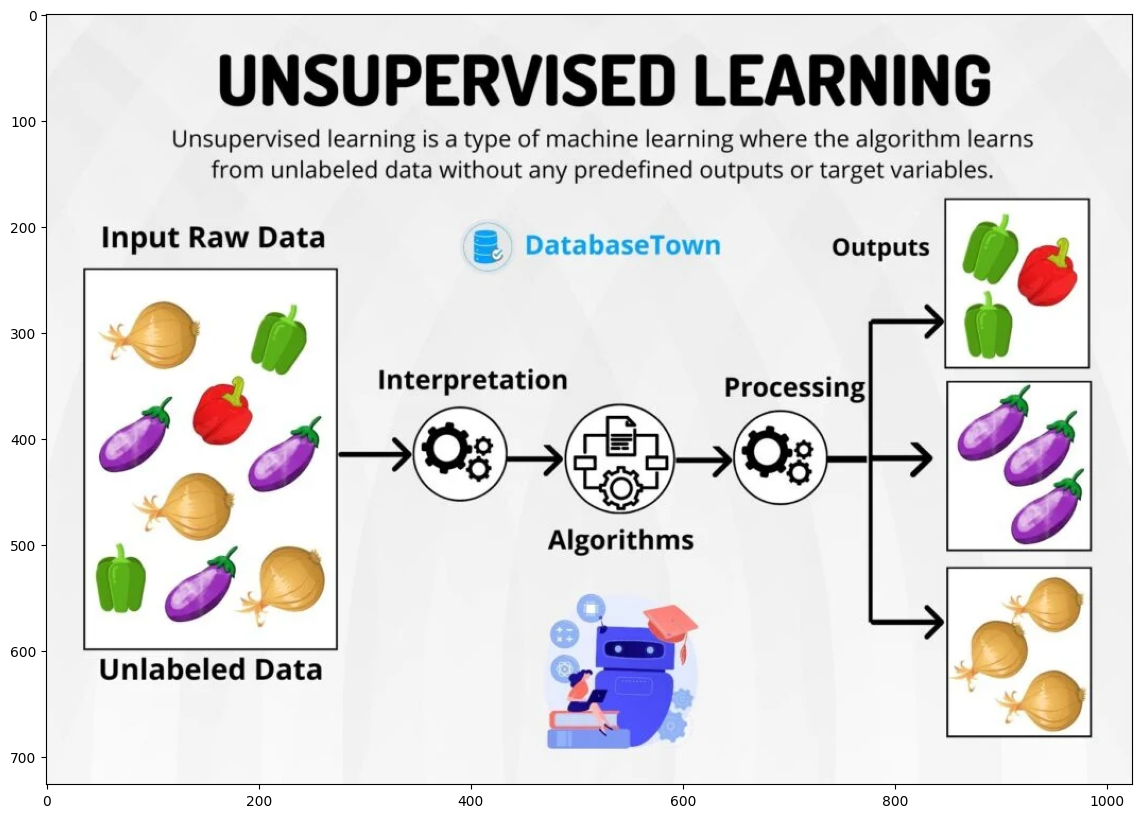

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('Documents/Unsupervised-Learning-1024x726.webp')
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()

### English 
- Unsupervised learning is when we do not have the target value that we can use for prediction. In unsupervised learning, instead of giving a prediction, we can group similar values into one cluster, which we will call 'K'
- ### German 
- Unsupervised learning liegt vor, wenn wir keinen Zielwert haben, den wir für Vorhersagen nutzen können. Beim unüberwachten Lernen gruppieren wir anstelle einer Vorhersage ähnliche Werte in einem Cluster, den wir 'K' nennen

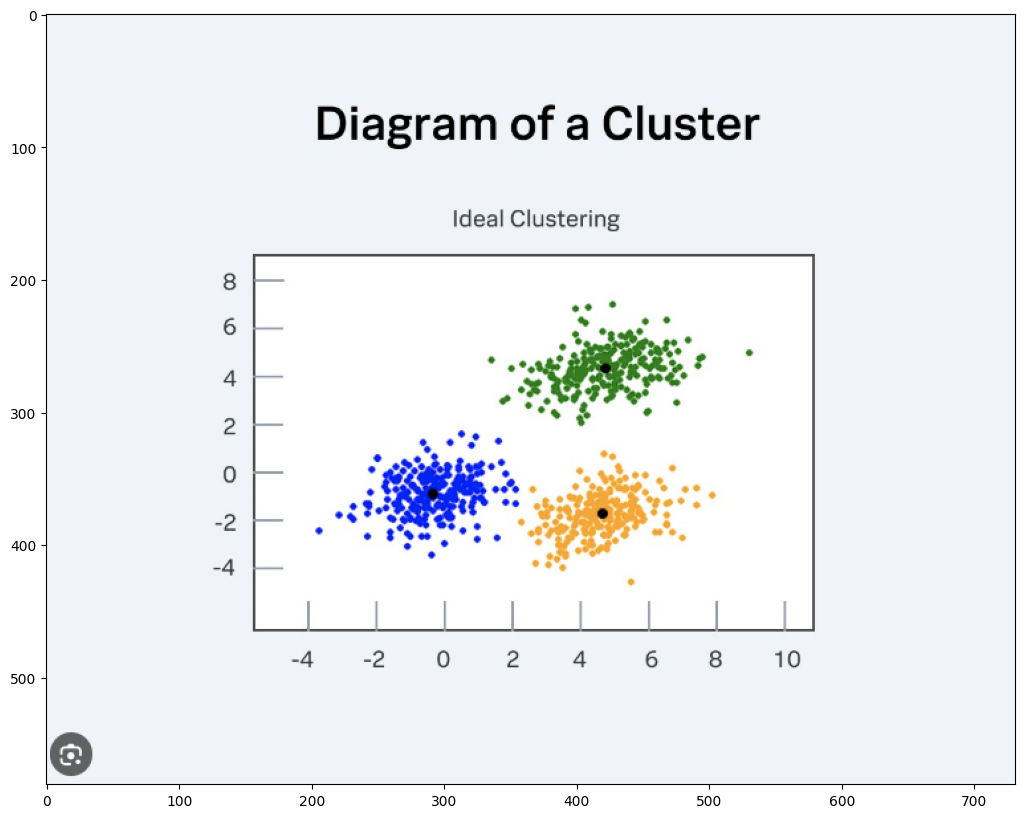

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('Documents/clustering.png')
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()

### English
- Step 1: The number of clusters is determined.
- Step 2: Random k centers are chosen.
- Step 3: Distances to k centers are calculated for each observation.
- Step 4: Each observation is assigned to the closest center, i.e., cluster.
- Step 5: After the assignment operations, center calculations are made again for the formed clusters.
- Step 6: This process is repeated for a predetermined number of iterations and the structure of the observations clustering is chosen as the one with the minimum total within-cluster variation.
- **Calculate the Mean Squared Error (within-cluster sum of squares (WCSS)) for each cluster by changing the cluster center and try to find the minimum mean squared value. The minimum value indicates the best separation among clusters.**
### German 
- Schritt 1: Die Anzahl der Cluster wird bestimmt.- 
Schritt 2: Zufällige k Zentren werden gewählt.- 
Schritt 3: Für jede Beobachtung werden die Entfernungen zu k Zentren berechnet- .
Schritt 4: Jede Beobachtung wird dem nächstgelegenen Zentrum, d.h. Cluster, zugewiese- Schritt 5: Nach den Zuweisungsoperationen werden erneut Zentrenberechnungen für die gebildeten Cluster durchgeführt.- 
Schritt 6: Dieser Prozess wird für eine vorbestimmte Anzahl von Iterationen wiederholt und die Struktur der Beobachtungsclusterung wird als diejenige mit der minimalen gesamten    inneren Cluster-Variation ausgewählt
- **Berechne den mittleren quadratischen Fehler (within-cluster sum of squares (WCSS)) für jeden Cluster, indem du das Clusterzentrum änderst, und versuche, den minimalen mittleren quadratischen Wert zu finden. Der Minimalwert zeigt die beste Trennung zwischen den Clustern an**.
n.


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

df = pd.read_csv('datasets/customers_data.csv')  

In [6]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


| Column Name        | Description (English)                                                      | Description (German)                                                                   | Observations                                                                     |
|--------------------|----------------------------------------------------------------------------|----------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Fresh              | Annual spending on fresh products (m.u.)                                   | Jährliche Ausgaben für frische Produkte (in Geldeinheiten)                             | Varied spending across clients. Possible presence of large-scale buyers.         |
| Milk               | Annual spending on milk products (m.u.)                                    | Jährliche Ausgaben für Milchprodukte (in Geldeinheiten)                                | Distribution might indicate both regular and heavy users of dairy products.      |
| Grocery            | Annual spending on grocery items (m.u.)                                    | Jährliche Ausgaben für Lebensmittel (in Geldeinheiten)                                 | High variability in spending, essential category for all clients.                |
| Frozen             | Annual spending on frozen products (m.u.)                                  | Jährliche Ausgaben für gefrorene Produkte (in Geldeinheiten)                           | Lower overall spending but important for identifying clients with specific needs.|
| Detergents_Paper   | Annual spending on detergents and paper products (m.u.)                    | Jährliche Ausgaben für Reinigungsmittel und Papierprodukte (in Geldeinheiten)          | Spending patterns can distinguish between household and commercial clients.      |
| Delicassen         | Annual spending on delicatessen products (m.u.)                            | Jährliche Ausgaben für Feinkostprodukte (in Geldeinheiten)                             | High spend in this category may indicate gourmet or specialty food retailers.    |



### English
- Each row represents a distinct customer of the wholesale distributor. The annual spending amounts for each product category (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen) recorded in monetary units (m.u.) for each customer are captured in the dataset.

### German 
- Jede Zeile stellt einen eindeutigen Kunden des Großhändlers dar. Das Dataset erfasst die jährlichen Ausgaben in Geldeinheiten (m.u.) für jede Produktkategorie (Frischwaren, Milchprodukte, Lebensmittel, Tiefkühlkost, Reinigungspapier, Feinkost) für jeden Kunden

In [7]:
from mymodule import check_df, find_categorical_columns, binary_columns_find

In [8]:
check_df(df)

##################### Shape #####################
(440, 6)
##################### Duplicate Values #####################
0
##################### NA #####################
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
##################### Types #####################
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
##################### Head #####################
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
##################### Unique Values #####################
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Pape

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


### English
- Analyze the values to figure out whether there could be outliers, because the k-means algorithm is sensitive to outlier values
### German 
- Analysiere die Werte, um herauszufinden, ob es Ausreißer geben könnte, da der k-Means-Algorithmus empfindlich auf Ausreißerwerte reagiert

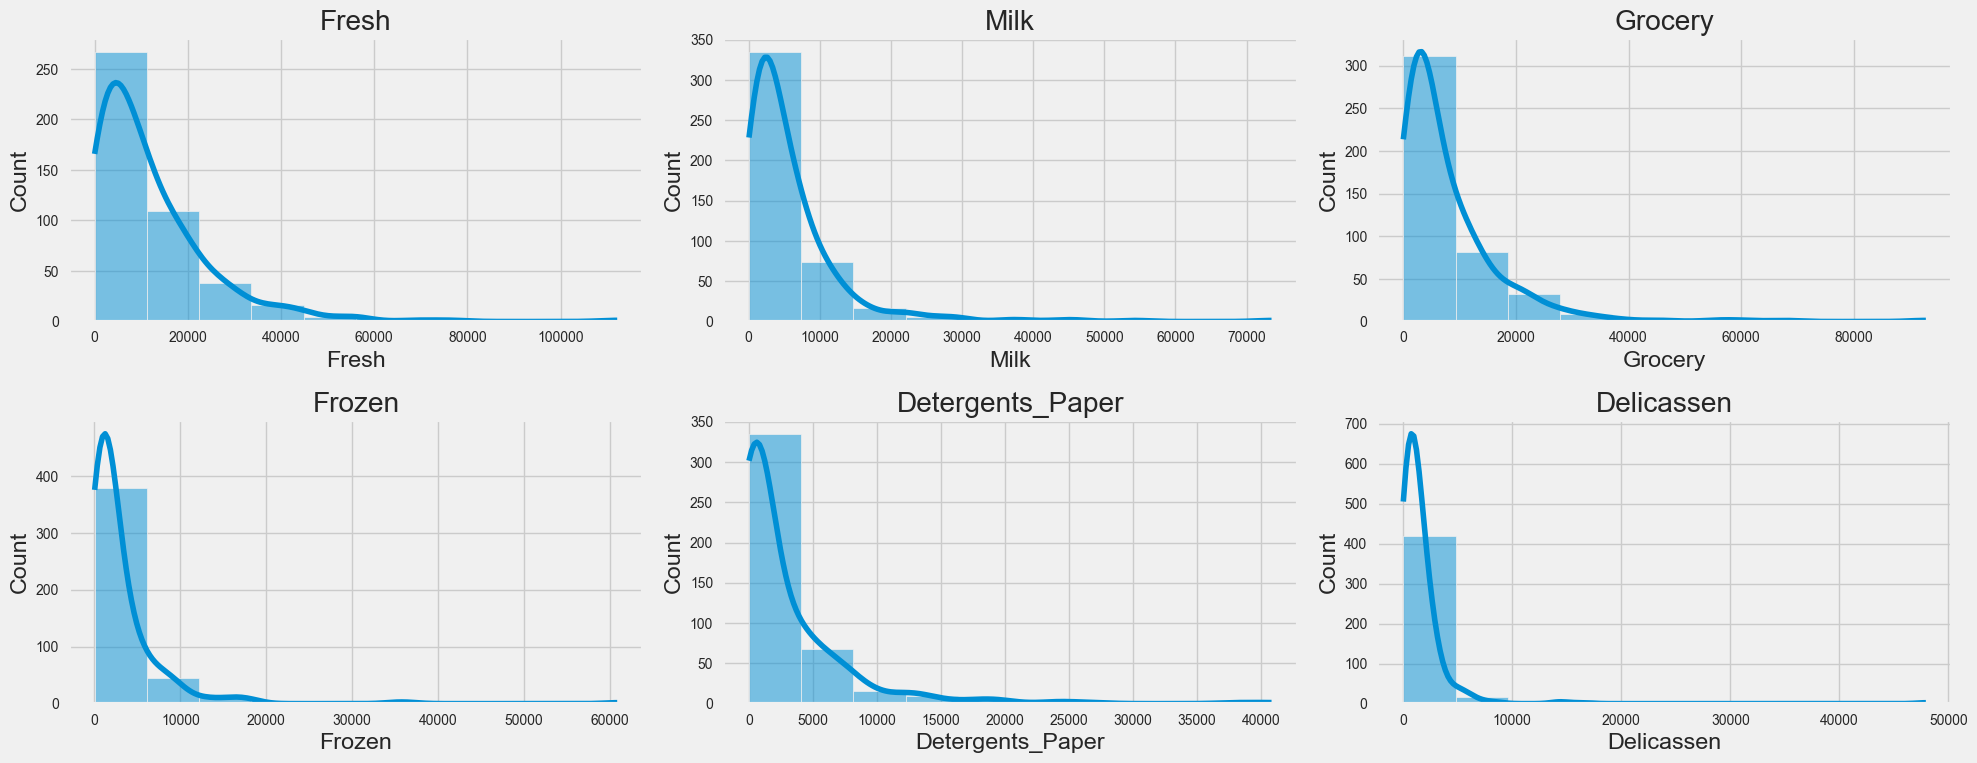

In [10]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(column)
plt.tight_layout()
plt.show()

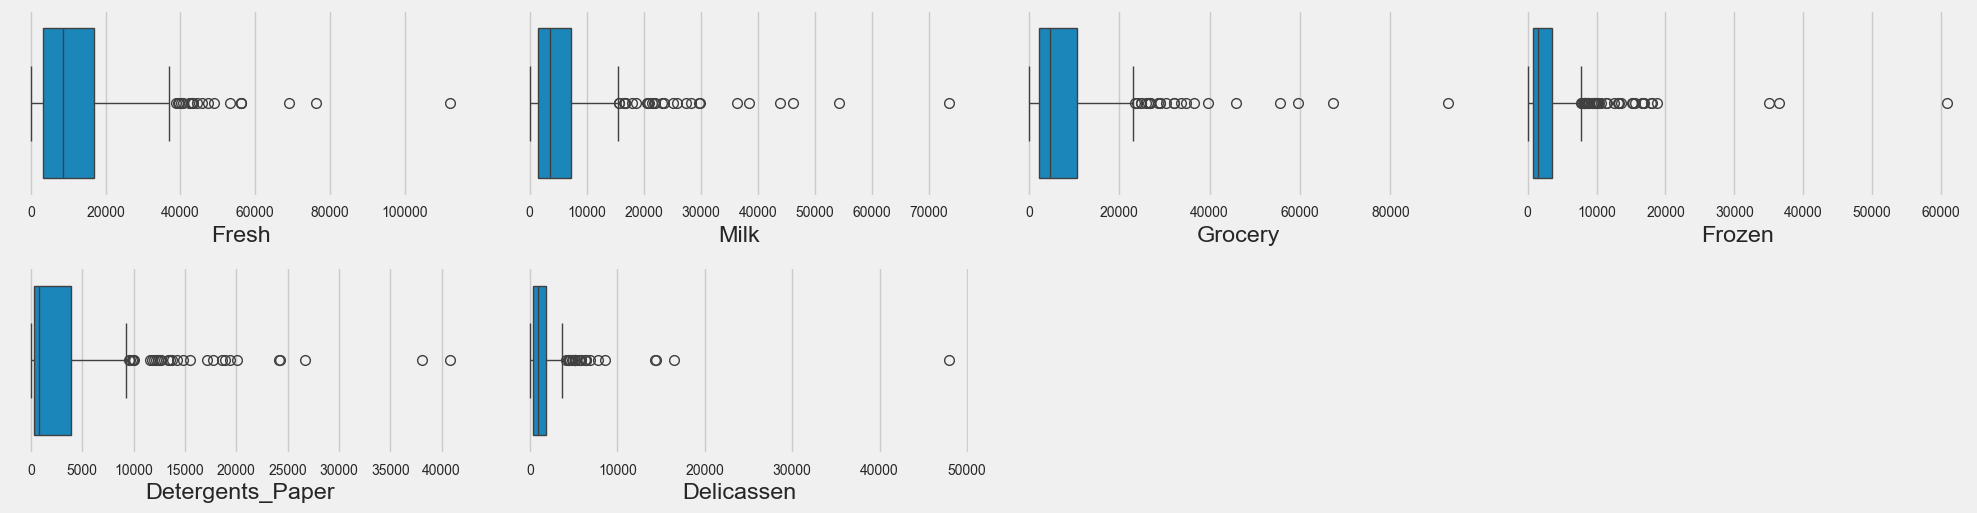

In [11]:
plt.figure(figsize=(20, 10)) 
for index, column in enumerate(df):
    plt.subplot(4, 4, index + 1)  
    sns.boxplot(x=column, data=df)
plt.tight_layout() 
plt.show()

In [12]:
def find_outlier_columns(df, q1_value, q2_value):
    """
    Identify columns in the DataFrame that contain outliers.
    :param df: A pandas DataFrame.
    :return: A list of column names that have outliers.
    """
    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['number']).columns
    # q1_value=0.25
    # q2_value=0.75
    for col in numerical_cols:
        Q1 = df[col].quantile(q1_value)
        Q3 = df[col].quantile(q2_value)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)
    return outlier_columns

In [13]:
find_outlier_columns(df, 0.01, 0.99)


['Frozen', 'Delicassen']

In [14]:
def replace_outliers_with_limits(df, lower_quantile=0.01, upper_quantile=0.99):
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        lower_limit = df[col].quantile(lower_quantile)
        upper_limit = df[col].quantile(upper_quantile)
        
        df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    return df

In [15]:
df=replace_outliers_with_limits(df)

## Scaling the dataset 

In [16]:
sc=StandardScaler()
df=sc.fit_transform(df)

In [17]:
df

array([[ 7.54726918e-02,  6.29695578e-01, -1.91787487e-02,
        -7.57914583e-01, -2.71411423e-02, -3.36850424e-02],
       [-4.10720970e-01,  6.53856711e-01,  2.28795877e-01,
        -3.19765794e-01,  1.20280462e-01,  2.64441563e-01],
       [-4.71711764e-01,  4.96652455e-01, -3.98149956e-03,
        -1.37769882e-01,  1.73390346e-01,  4.39465216e+00],
       ...,
       [ 2.36786412e-01,  1.54468083e+00,  2.78329284e+00,
        -6.94796250e-01,  2.87056268e+00,  3.26381109e-01],
       [-1.30631143e-01, -5.74438824e-01, -6.77602656e-01,
        -5.24688096e-01, -6.23972389e-01,  5.01989931e-01],
       [-7.80650930e-01, -6.18838829e-01, -6.43254402e-01,
        -8.00087819e-01, -5.50380667e-01, -9.09006536e-01]])

### English 
- Scaling is very important in k-means clustering because it finds the distance to determine the best cluster mean
### German 
- Skalierung ist beim k-Means-Clustering sehr wichtig, da sie die Entfernung ermittelt, um das beste Cluster-Mittel zu bestimmen

  File "C:\Users\habdullayev\Documents\Machine_learning_course\ml_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


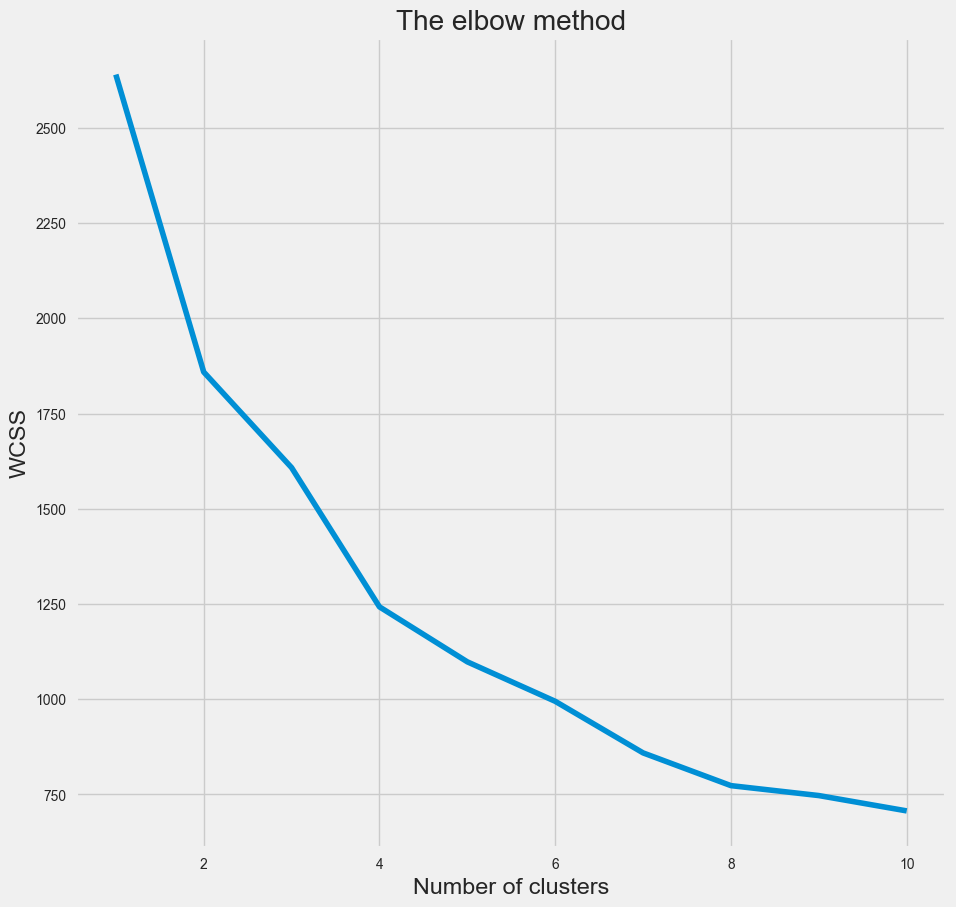

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10000, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


### English 
- Finding the best number for clusters is changing; it depends on the business analyzing demand. However, the elbow method can also help to define the optimal number of clusters
- The point where WCSS decreases sharply can be chosen as the optimum number of clusters.
### German 
- Die optimale Anzahl von Clustern zu finden, ändert sich; sie hängt von der Nachfrage der Geschäftsanalyse ab. Allerdings kann die Ellenbogenmethode auch dabei helfen, die optimale Anzahl von Clustern zu bestimmen
- Der Punkt, an dem die WCSS stark abnimmt, kann als optimale Anzahl von Clustern gewählt werden

## KElbowVisualizer 

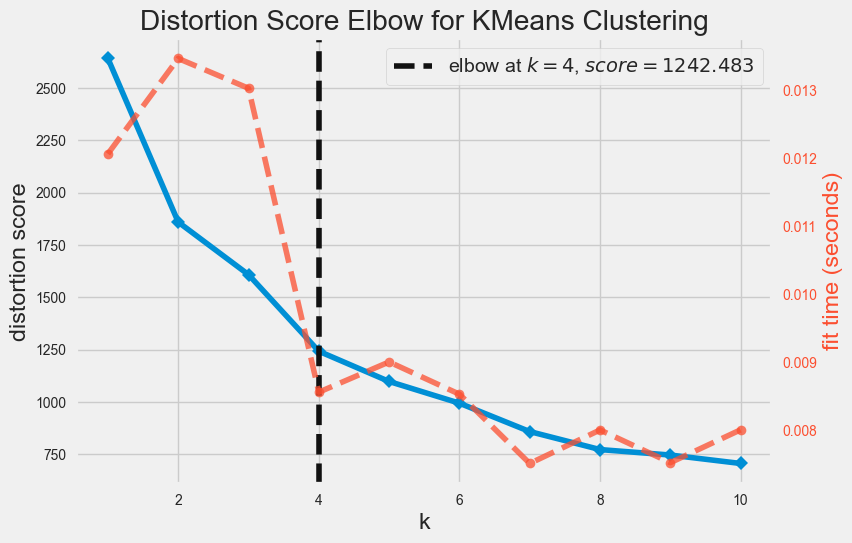

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
kmeans = KMeans(max_iter = 10000, random_state = 0)
elbow = KElbowVisualizer(kmeans, k=(1, 11) )
elbow.fit(df)
elbow.show()

In [20]:
## FRM Anaysis 

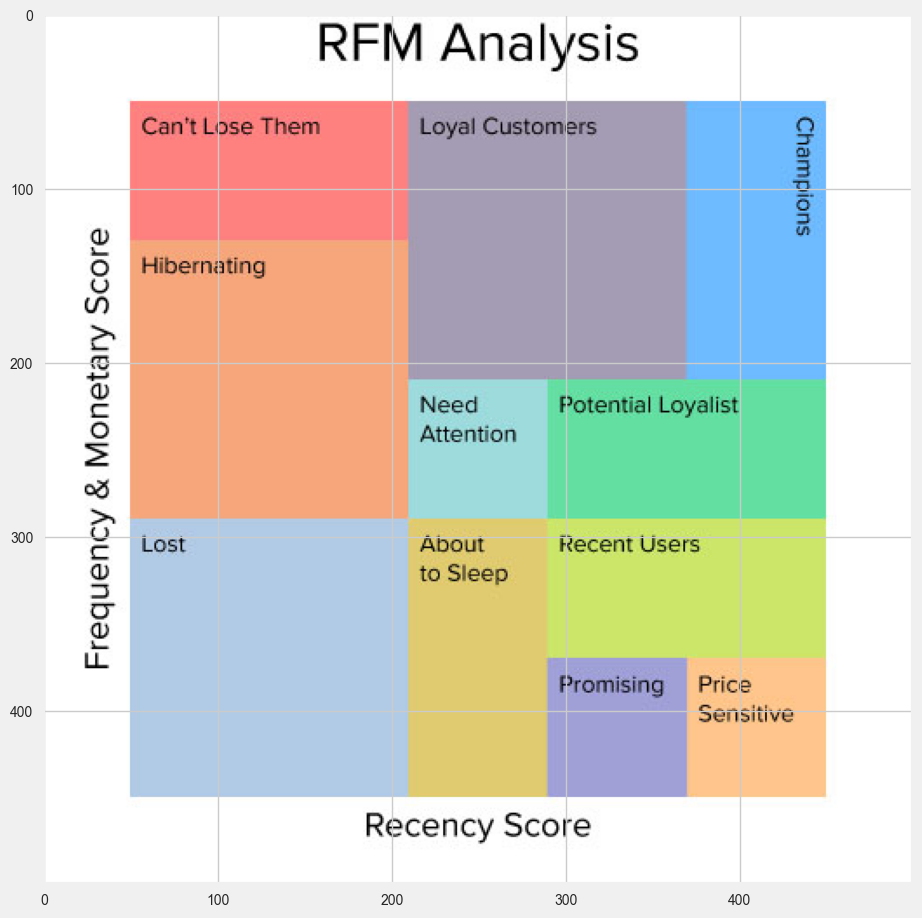

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('Documents/Customer-Segmentation-Using-RFM-Analysis.jpg')
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

In [22]:
## Training model 2 cluster 

In [23]:
kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)

In [24]:
kmeans.fit(df)

KMeans(max_iter=1000, n_clusters=2, random_state=0)

In [25]:
kmeans.cluster_centers_

array([[ 0.04037016, -0.29202217, -0.33543049,  0.01221753, -0.31057884,
        -0.15092142],
       [-0.22474732,  1.62573537,  1.86739662, -0.06801701,  1.72904338,
         0.84020433]])

### English 
 - Each value represents the relative value of each product (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen). Positive values indicate that the customer often buys this product, while negative values represent that they do not buy it often
 - The key takeaway is that K-means doesn't create clusters based on high and low spending in absolute terms but rather on similar spending patterns across all categories.
 - Positive and negative values do not represent high or low spending; they just show the similarity of each value 


### German
- Jeder Wert repräsentiert den relativen Wert jedes Produkts (Frischwaren, Milch, Lebensmittel, Tiefkühlkost, Reinigungspapier, Feinkost). Positive Werte deuten darauf hin, dass der Kunde dieses Produkt oft kauft, während negative Werte darstellen, dass sie es nicht oft kaufen
- "Die wichtigste Erkenntnis ist, dass K-means keine Cluster auf Basis von hohen und niedrigen Ausgaben in absoluten Zahlen bildet, sondern eher auf ähnlichen Ausgabenmustern über alle Kategorien hinweg.- Positive und negative Werte repräsentieren keine hohen oder niedrigen Ausgaben; sie zeigen nur die Ähnlichkeit jedes Wertesn.

In [26]:
## Training model 4 cluster 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
kmeans = KMeans(n_clusters = 4, max_iter = 1000, random_state = 0)
kmeans.fit(df)
kmeans.cluster_centers_

array([[2.32411518e+04, 3.83537500e+03, 5.09791071e+03, 3.68340179e+03,
        1.13574107e+03, 1.63959821e+03, 1.78571429e-02],
       [5.80408647e+03, 4.03525188e+03, 5.46584962e+03, 2.39726692e+03,
        1.91980827e+03, 1.06115038e+03, 4.88721805e-02],
       [8.14983673e+03, 1.87158571e+04, 2.77565918e+04, 2.03471429e+03,
        1.25230204e+04, 2.28214286e+03, 1.00000000e+00],
       [5.64533077e+04, 1.00262308e+04, 8.73900000e+03, 1.55180769e+04,
        1.25823077e+03, 7.17053846e+03, 2.30769231e-01]])

In [36]:
clusters=kmeans.labels_
clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 3, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 2,
       1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 3, 3, 1, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 3, 0, 3, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [37]:
df = pd.read_csv('datasets/customers_data.csv')  

In [38]:
df['clusters']=clusters

In [39]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


In [40]:

df.groupby("clusters").agg(["count","mean","median"])

Fresh                         Milk                        Grocery  \
         count          mean   median count          mean   median   count   
clusters                                                                     
0          112  23241.151786  20905.5   112   3835.375000   2964.5     112   
1          266   5804.086466   5391.5   266   4035.251880   3089.0     266   
2           49   8149.836735   5531.0    49  18715.857143  14641.0      49   
3           13  56453.307692  53205.0    13  10026.230769   4563.0      13   

                                Frozen                       Detergents_Paper  \
                  mean   median  count          mean  median            count   
clusters                                                                        
0          5097.910714   3726.5    112   3683.401786  2476.0              112   
1          5465.849624   3738.0    266   2397.266917  1194.5              266   
2         27756.591837  23127.0     49   2034.714286  1274.0               49   
3          8739.000000   7336.0     13  15518.076923  8692.0               13   

                                Delicassen                       
                  mean   median      count         mean  median  
clusters                                                         
0          1135.741071    475.5        112  1639.598214  1160.5  
1          1919.808271    713.5        266  1061.150376   733.0  
2         12523.020408  11577.0         49  2282.142857  1452.0  
3          1258.230769    967.0         13  7170.538462  2498.0